**M.Abdullah 23i2597



M.Romaan Khawar 23i2554**

Module 1

In [1]:
# DATA ACQUISITION AND PREPROCESSING

import numpy as np
import pandas as pd

df = pd.read_json("electronics.json")
print(df.head(5))
print(df.info())
print(df.describe(include="all"))

missing_values = df.isnull().sum()
print(missing_values)

int_cols = ["Age", "Purchase_Amount", "Average_Spending_Per_Purchase", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score", "Month", "Year"]

for i in int_cols:
    df[i] = df[i].apply(pd.to_numeric, errors = 'coerce')
    median = df[i].median()
    df[i] = df[i].fillna(median).astype(int)

outliers = {}
for col in int_cols:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Display outliers for each column
for col, values in outliers.items():
    print(f"Outliers in '{col}':")
    print(values)
# NO OUTLIERS

df = df.replace('', np.nan)
df = df.dropna(subset=['Customer_ID'])
df["Gender"] = df["Gender"].replace("Hidden", "Other")
print(df.info())

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
print(df.info())


# Ensure Purchase_Date is datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# Total Annual Spending
df['Total_Annual_Spending'] = df['Average_Spending_Per_Purchase'] * df['Purchase_Frequency_Per_Month'] * 12

# Recency
df['Recency'] = df.groupby('Customer_ID')['Purchase_Date'].transform(lambda x: (x.max() - x).dt.days)

# Dominant Brand
dominant_brand = df.groupby(['Customer_ID', 'Brand'])['Purchase_Amount'].sum().reset_index()
dominant_brand = dominant_brand.loc[dominant_brand.groupby('Customer_ID')['Purchase_Amount'].idxmax()]
dominant_brand = dominant_brand.set_index('Customer_ID')['Brand']
df['Dominant_Brand'] = df['Customer_ID'].map(dominant_brand)

# Top Product Category
df['Product_Category'] = df['Product_Category'].fillna('Unknown')
df['Top_Product_Category'] = df.groupby('Customer_ID')['Product_Category'].agg(lambda x: x.value_counts().idxmax())

print(df)


                            Customer_ID Age  Gender Income_Level  \
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43  40  Female       Medium   
1                                        25    Male         High   
2  fdf79bcd-5908-4c90-8501-570ffb5b7648  57   Other          Low   
3  878dccba-893a-48f9-8d34-6ed394fa3c9c  38  Female       Medium   
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743  68   Other       Medium   

                                             Address  \
0  43548 Murray Islands Suite 974\nAmyberg, CT 13457   
1                                                      
2     79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
3  02998 Hall Meadows Suite 809\nNorth Robertvill...   
4  21411 Timothy Ford Apt. 320\nDavisborough, AR ...   

                         Transaction_ID Purchase_Date  \
0  c6a6c712-e36b-406a-bfde-f53bdcf4744f    2022-04-26   
1  0b587838-1e4f-4231-b488-42bcd47c052a    2021-08-10   
2  462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
3  3cfafa02-6b34-4d77-9e05

Module 2

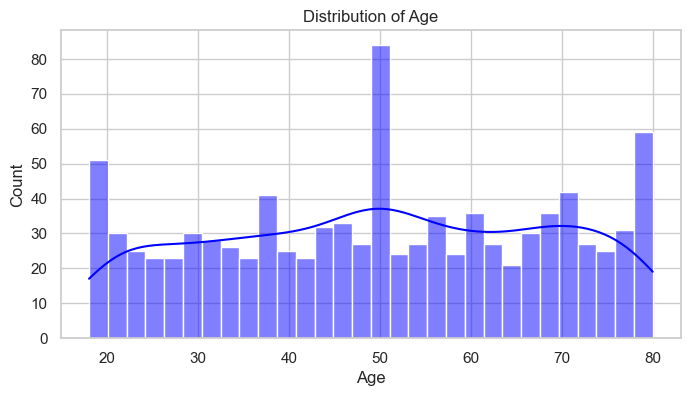

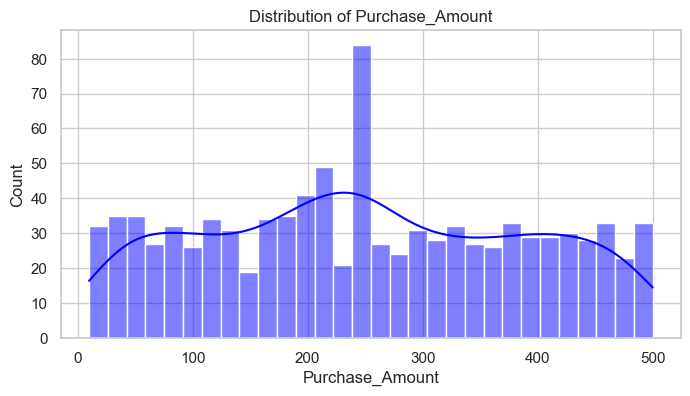

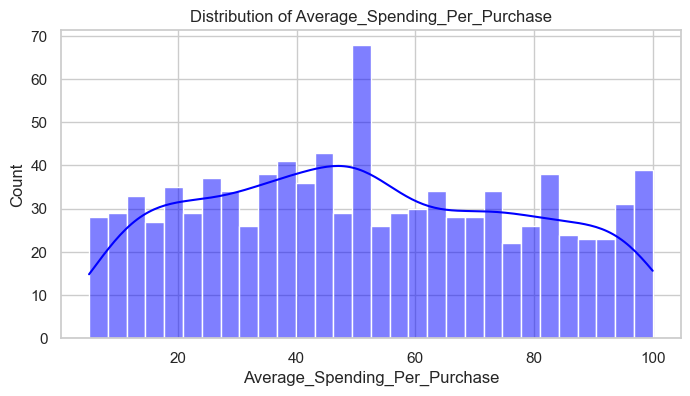

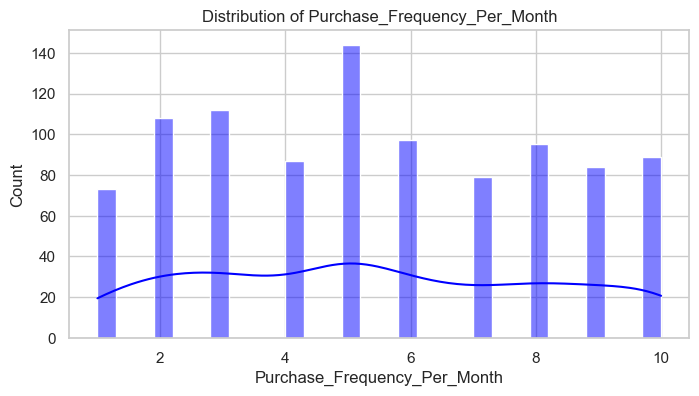

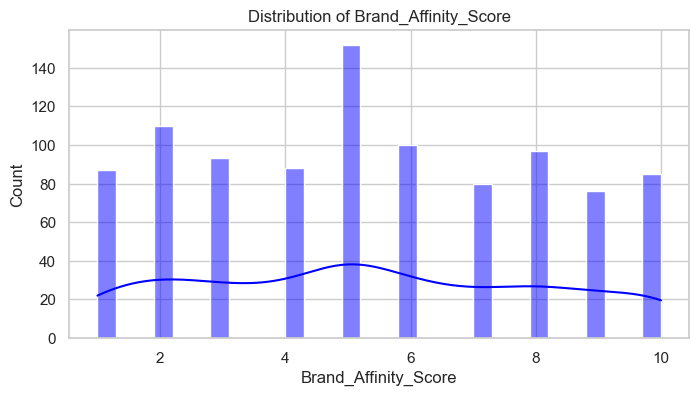

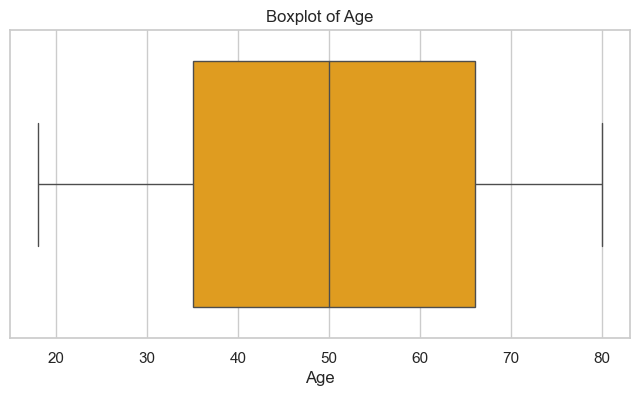

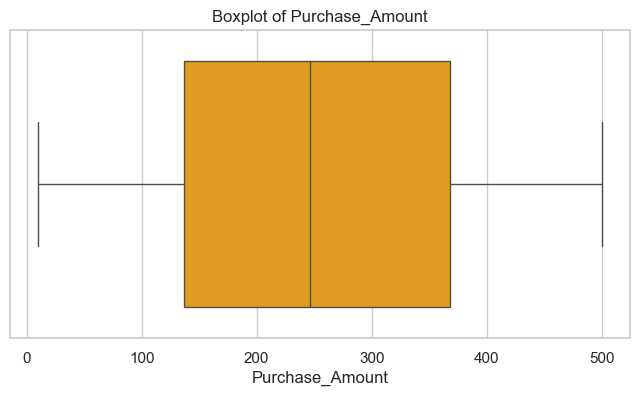

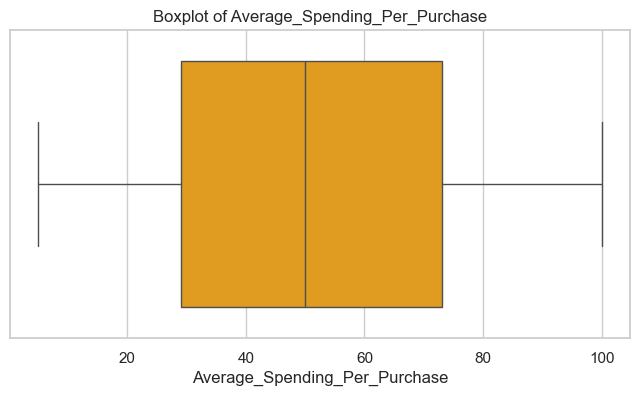

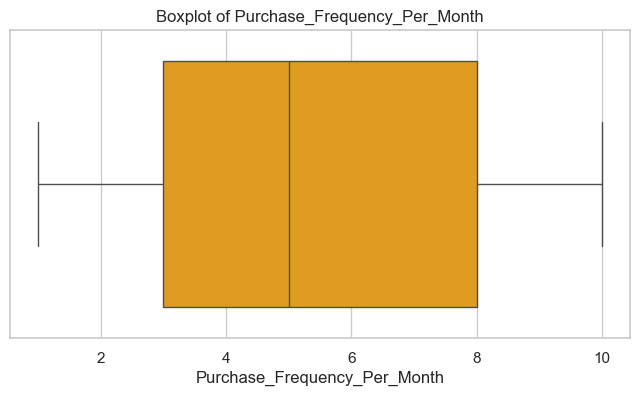

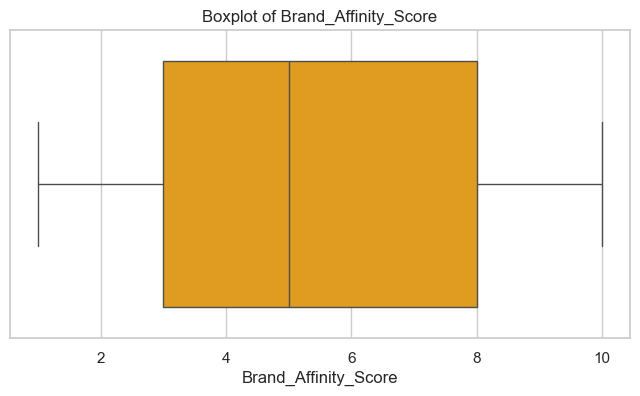

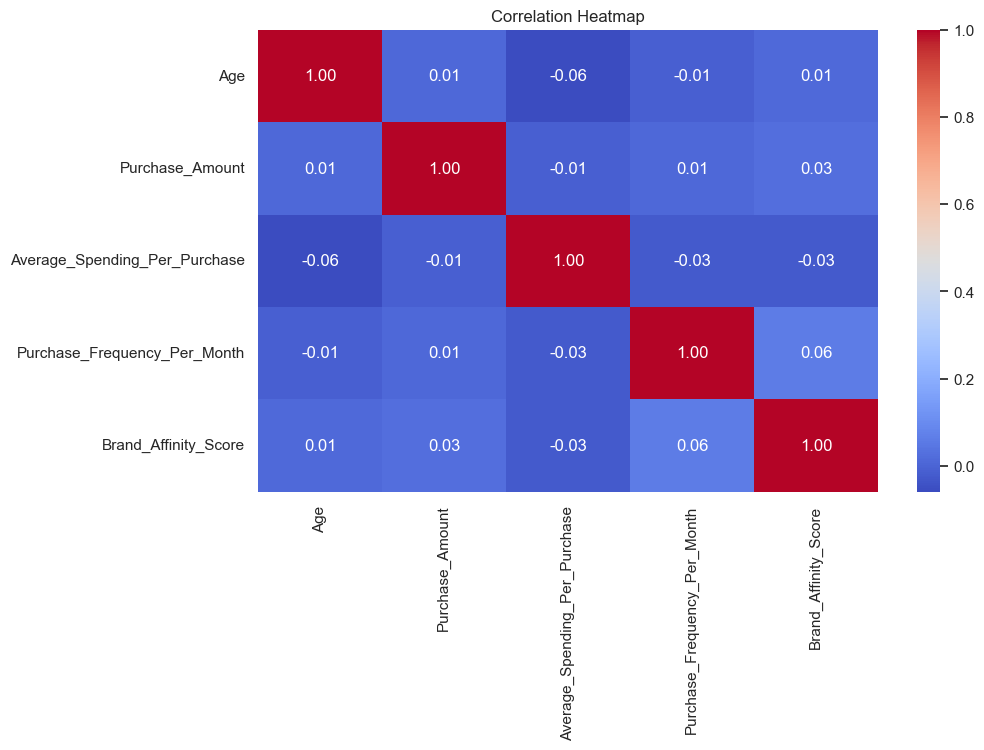

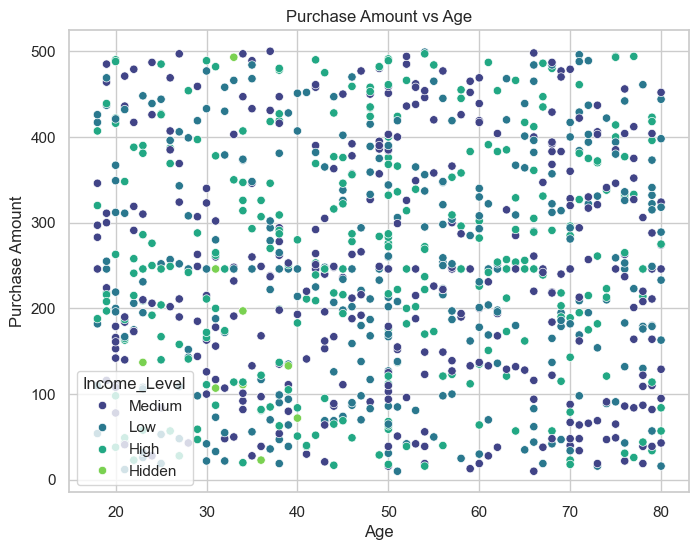

C:\Users\HP\AppData\Local\Temp\ipykernel_8336\1831835681.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Income_Level'], y=df['Purchase_Amount'], palette="Set2")


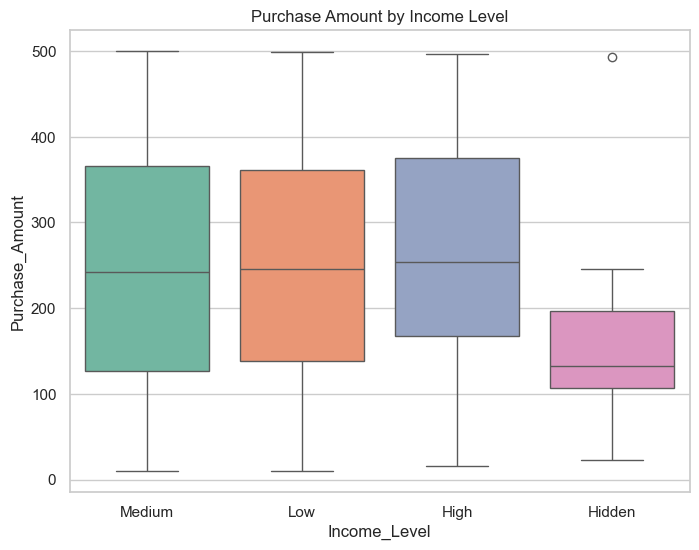

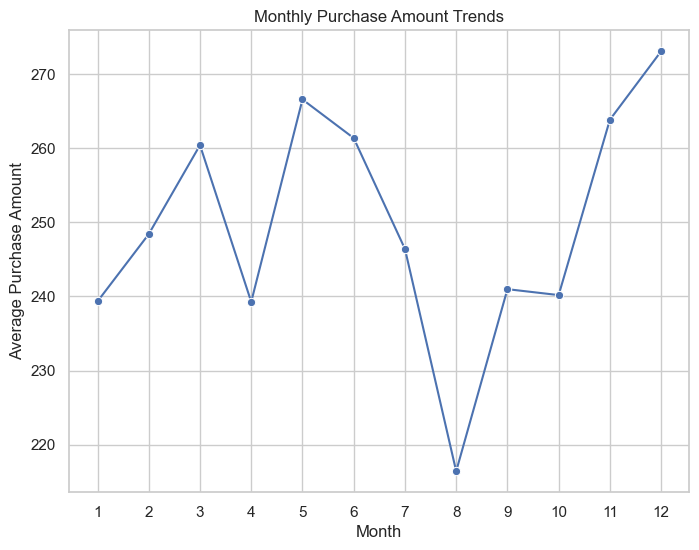

C:\Users\HP\AppData\Local\Temp\ipykernel_8336\1831835681.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Purchase_Amount', data=seasonal_trends, palette="Set3")


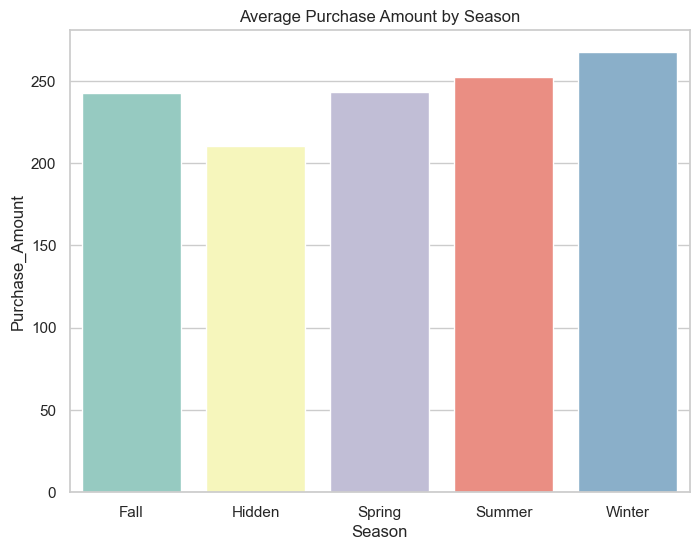

In [2]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# 1. Univariate Analysis
# Histograms for numeric columns
num_cols = ["Age", "Purchase_Amount", "Average_Spending_Per_Purchase", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score"]

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to identify outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

# 2. Bivariate Analysis
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatterplots for specific feature relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Purchase_Amount'], hue=df['Income_Level'], palette='viridis')
plt.title('Purchase Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

# Boxplot of Purchase Amount by Income Level
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income_Level'], y=df['Purchase_Amount'], palette="Set2")
plt.title('Purchase Amount by Income Level')
plt.show()

# 3. Temporal Analysis
# Convert Purchase_Date to datetime if not already
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# Monthly trends
df['Month'] = df['Purchase_Date'].dt.month
df['Year'] = df['Purchase_Date'].dt.year

monthly_trends = df.groupby('Month')['Purchase_Amount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='Month', y='Purchase_Amount', data=monthly_trends, marker='o')
plt.title('Monthly Purchase Amount Trends')
plt.xlabel('Month')
plt.ylabel('Average Purchase Amount')
plt.xticks(range(1, 13))
plt.show()

# Seasonal trends
seasonal_trends = df.groupby('Season')['Purchase_Amount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='Purchase_Amount', data=seasonal_trends, palette="Set3")
plt.title('Average Purchase Amount by Season')
plt.show()


In [3]:
print(df["Gender"].value_counts())

Gender
Other     336
Female    309
Male      290
Name: count, dtype: int64


Module 3

Purchase_Frequency_Per_Month      0
Average_Spending_Per_Purchase    47
Brand_Affinity_Score              0
Product_Category_Preferences      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    953 non-null    object        
 1   Age                            953 non-null    float64       
 2   Gender                         953 non-null    float64       
 3   Income_Level                   953 non-null    object        
 4   Address                        953 non-null    object        
 5   Transaction_ID                 953 non-null    object        
 6   Purchase_Date                  952 non-null    datetime64[ns]
 7   Product_ID                     953 non-null    object        
 8   Product_Category               953 non-null    object        
 9   B

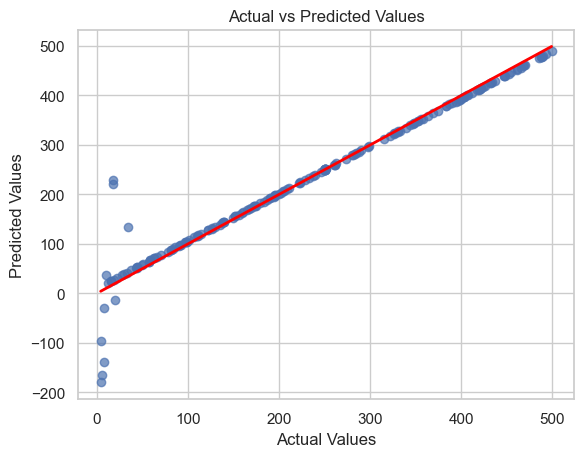

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_json("electronics.json")

# Preprocess the data
# Convert numeric columns to numeric, coerce invalid parsing to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Purchase_Amount'] = pd.to_numeric(data['Purchase_Amount'], errors='coerce')
data['Average_Spending_Per_Purchase'] = pd.to_numeric(data['Average_Spending_Per_Purchase'], errors='coerce')
data['Brand_Affinity_Score'] = pd.to_numeric(data['Brand_Affinity_Score'], errors='coerce')

# Handle missing values: fill with mean for numerical columns, mode for categorical columns
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Purchase_Amount'] = data['Purchase_Amount'].fillna(data['Purchase_Amount'].mean())
data['Average_Spending_Per_Purchase'] = data['Average_Spending_Per_Purchase'].fillna(data['Average_Spending_Per_Purchase'].mean())
data['Brand_Affinity_Score'] = data['Brand_Affinity_Score'].fillna(data['Brand_Affinity_Score'].mean())
data['Income_Level'] = data['Income_Level'].fillna(data['Income_Level'].mode()[0])  # Fill categorical column with mode
data['Gender'] = data['Gender'].map({'Other': 0, 'Male': 1, 'Female': 2}).fillna(0)  # Encoding Gender

# Feature engineering
# Creating a new feature: Purchase Frequency per Month
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], errors='coerce')
data['Purchase_Month_Year'] = data['Purchase_Date'].dt.to_period('M')
data['Purchase_Frequency_Per_Month'] = data.groupby('Customer_ID')['Purchase_Month_Year'].transform('nunique')

# Creating a new feature: Average Spending Per Purchase
data['Average_Spending_Per_Purchase'] = data['Purchase_Amount'] / data['Purchase_Frequency_Per_Month'].replace(0, np.nan)

# Creating a new feature: Brand Affinity Score (Number of unique brands a customer bought from)
data['Brand_Affinity_Score'] = data.groupby('Customer_ID')['Brand'].transform('nunique')

# Creating a new feature: Product Category Preferences (Number of unique product categories purchased by the customer)
data['Product_Category_Preferences'] = data.groupby('Customer_ID')['Product_Category'].transform('nunique')

# Standardization (Z-score Scaling) for numeric columns
data['Standardized_Avg_Spending'] = (data['Average_Spending_Per_Purchase'] - data['Average_Spending_Per_Purchase'].mean()) / data['Average_Spending_Per_Purchase'].std()

# Normalization (Min-Max Scaling) for numeric columns
data['Normalized_Purchase_Amount'] = (data['Purchase_Amount'] - data['Purchase_Amount'].min()) / (data['Purchase_Amount'].max() - data['Purchase_Amount'].min())

# Check if the columns have any NaN values after transformations
print(data[['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase', 'Brand_Affinity_Score', 'Product_Category_Preferences']].isna().sum())

# Drop rows with any remaining NaN values
data.dropna(subset=['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase', 'Brand_Affinity_Score', 'Product_Category_Preferences'], inplace=True)

# Display the cleaned dataset info
print(data.info())

# Selecting features and target
X = data[['Age', 'Purchase_Amount', 'Brand_Affinity_Score', 'Gender']]  # Features
y = data['Average_Spending_Per_Purchase']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization Actual vs Predicted Values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8336\1933597401.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)  # Replace NaN with median
C:\Users\HP\AppData\Local\Temp\ipykernel_8336\1933597401.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway


Decision Tree Classification Evaluation:
Accuracy: 0.93
Precision: 0.93
Recall: 1.00
F1 Score: 0.96


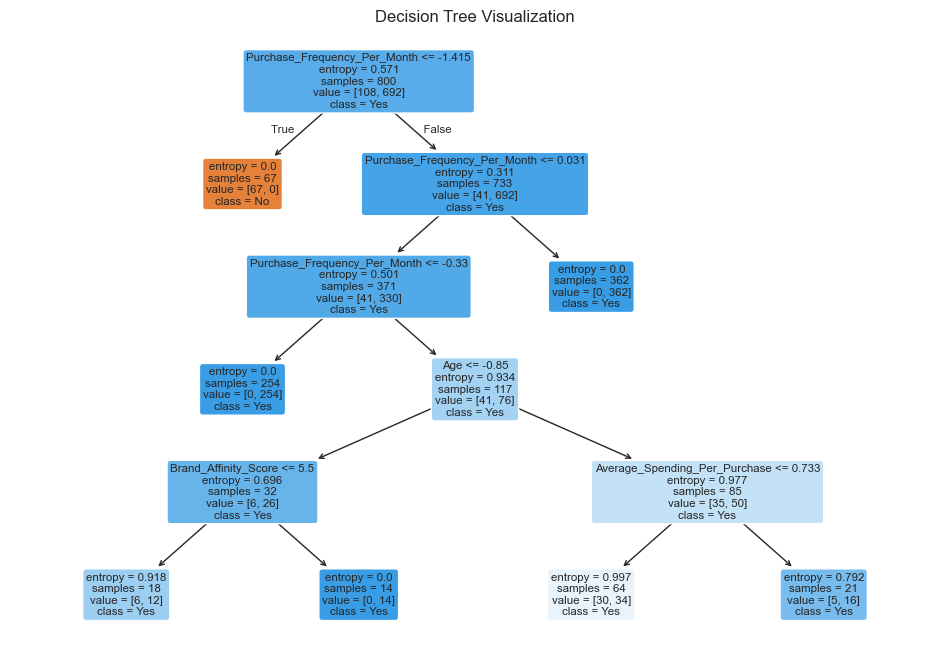

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
data = pd.read_csv("preprocessed_electronics.csv")

# Create binary target variable based on 'Will_Purchase_Next_Month'
data['Will_Purchase_Next_Month'] = data['Will_Purchase_Next_Month']

# Select features for classification
classification_features = ['Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']
target = 'Will_Purchase_Next_Month'

# Handle missing values by replacing them with the median (if necessary)
for column in classification_features:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric, setting invalid entries to NaN
    data[column].fillna(data[column].median(), inplace=True)  # Replace NaN with median

# Prepare the feature matrix X and target vector y
X = data[classification_features]
y = data[target]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Classification Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=classification_features, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Module 4

C:\Users\HP\AppData\Local\Temp\ipykernel_8336\3123920738.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8336\3123920738.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

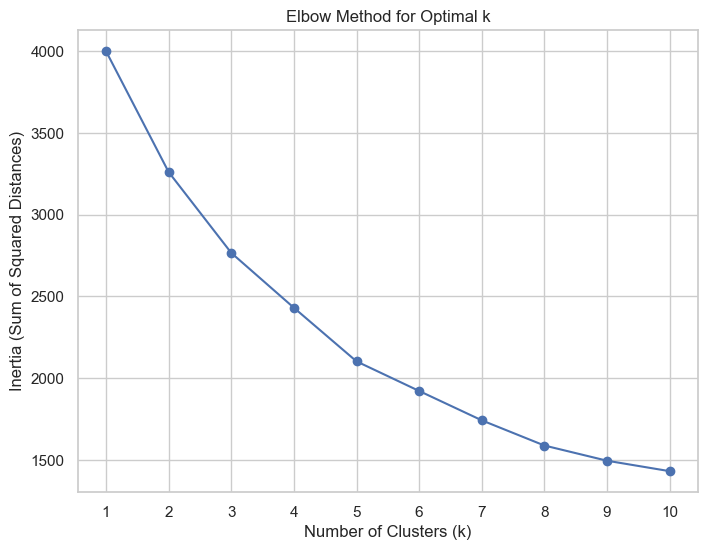


Cluster Summary:
  Cluster       Age           Purchase_Frequency_Per_Month            \
               mean       std                         mean       std   
0       0  0.320579  0.824466                    -0.885455  0.570488   
1       1  0.211755  0.810426                    -0.037742  0.913006   
2       2  0.754359  0.618042                     0.883317  0.637534   
3       3 -1.149420  0.464252                     0.094407  0.946781   

  Brand_Affinity_Score           Average_Spending_Per_Purchase            
                  mean       std                          mean       std  
0             3.380567  1.764863                     -0.291631  0.920350  
1             8.191406  1.512848                     -0.671463  0.748733  
2             4.708696  2.429335                      0.437486  0.885877  
3             4.988764  2.555376                      0.536726  0.891892  


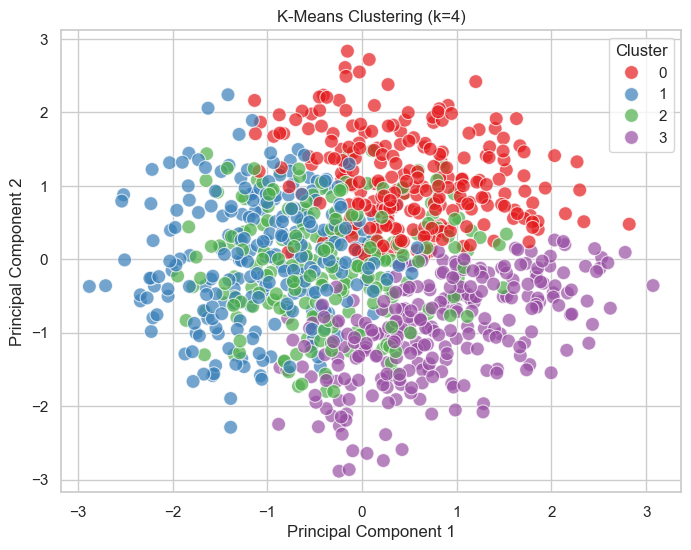

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
data = pd.read_csv("preprocessed_electronics.csv")

# Select features for clustering
clustering_features = ['Age', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Average_Spending_Per_Purchase']

# Handle missing values by filling with median values (if necessary)
for column in clustering_features:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column].fillna(data[column].median(), inplace=True)

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[clustering_features])

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)  # Test for k = 1 to k = 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_range)
plt.show()

# Based on the elbow plot, choose k (typically the "elbow" point)
# Let's assume we chose k=4 after observing the plot.
k_optimal = 4

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Purchase_Frequency_Per_Month': ['mean', 'std'],
    'Brand_Affinity_Score': ['mean', 'std'],
    'Average_Spending_Per_Purchase': ['mean', 'std']
}).reset_index()

print("\nCluster Summary:")
print(cluster_summary)

# Visualize the clusters (e.g., using PCA to reduce dimensionality to 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
cluster_data = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
cluster_data['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=cluster_data, palette='Set1', s=100, alpha=0.7)
plt.title(f"K-Means Clustering (k={k_optimal})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', loc='best')
plt.show()


